In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define custom colormap
colormap = LinearSegmentedColormap('PastelBlueRed', {
    'red': (
        (0.0, 255./255., 255./255.),
        (0.5, 193./255., 193./255.),
        (1.0, 132./255., 132./255.),
    ),
    'green': (
        (0.0, 112./255., 112./255.),
        (0.5, 139./255., 139./255.),
        (1.0, 234./255., 234./255.),
    ),
    'blue': (
        (0.0, 112./255., 112./255.),
        (0.5, 164./255., 164./255.),
        (1.0, 255./255., 255./255.),
    ),
})

def draw(function, name=None):
    plot_range = [-1, 2]

    # Define figure size and formatting
    plt.figure(1, figsize=(9,7)).subplots_adjust(left=0.10, bottom=0.09, top=0.98, right=0.98)
    plt.title(name or function.__name__, fontsize=30)
    plt.xlabel('x1', fontsize=24)
    plt.ylabel('x2', fontsize=24)
    plt.xlim(plot_range)
    plt.ylim(plot_range)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Create many points
    x1, x2 = np.mgrid[plot_range[0]:plot_range[1]:0.01, plot_range[0]:plot_range[1]:0.01]
    z = function(x1, x2)
    plt.scatter(x1, x2, c=z, s=0.1, alpha=0.6, cmap=colormap)
    
    # Create big points
    x1 = np.array([0, 0, 1, 1])
    x2 = np.array([0, 1, 0, 1])
    z = function(x1, x2)
    plt.scatter(x1, x2, c=z, s=100, cmap=colormap)
    
    plt.colorbar()

    # Print truth table
    print(f'{name:4} : {z}')
    # Render image
    plt.show()






# Perceptron
def perceptron(bias, w1, w2):
    return lambda x1, x2: (bias + x1*w1 + x2*w2 > 0).astype(int)

# How to use it
AND = perceptron(-.7, .5, .5)
NAND = perceptron(.7, -.5, -.5)
OR = perceptron(-0.2, .5, .5)
XOR = lambda *input: AND(NAND(*input), OR(*input))

AND  : [0 0 0 1]


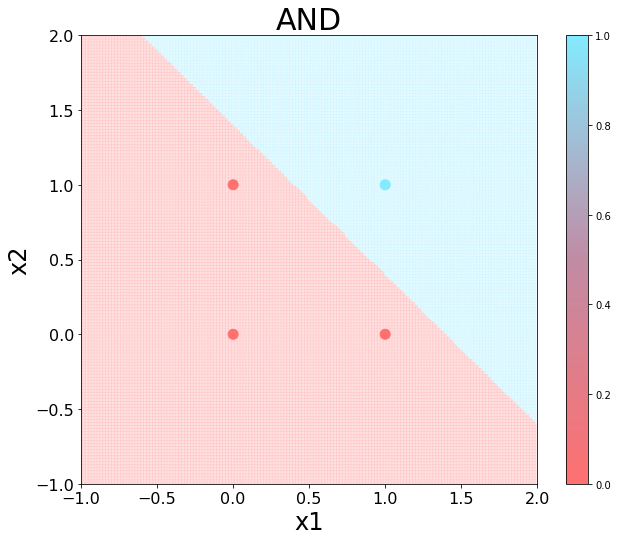

In [36]:
draw(AND, 'AND')

NAND : [1 1 1 0]


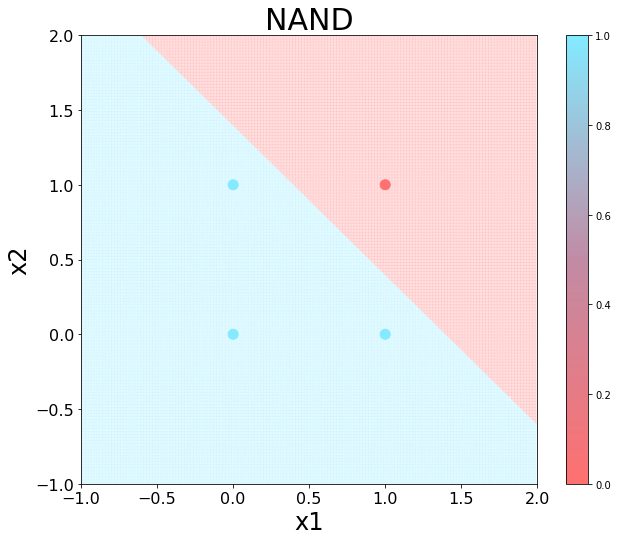

In [37]:
draw(NAND, 'NAND')

OR   : [0 1 1 1]


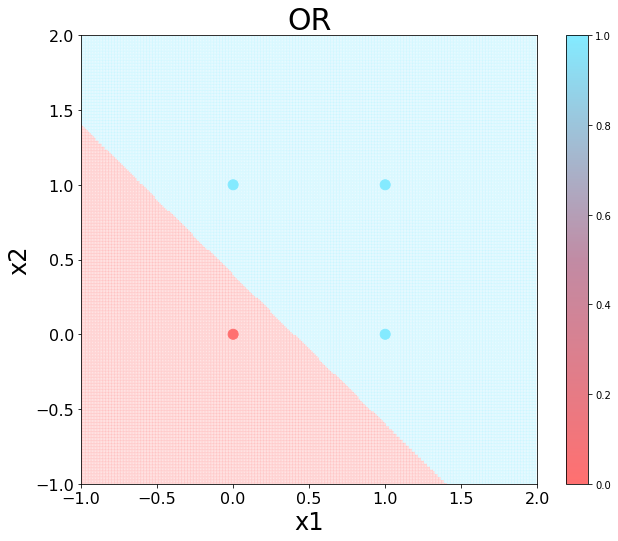

In [38]:
draw(OR, 'OR')

XOR  : [0 1 1 0]


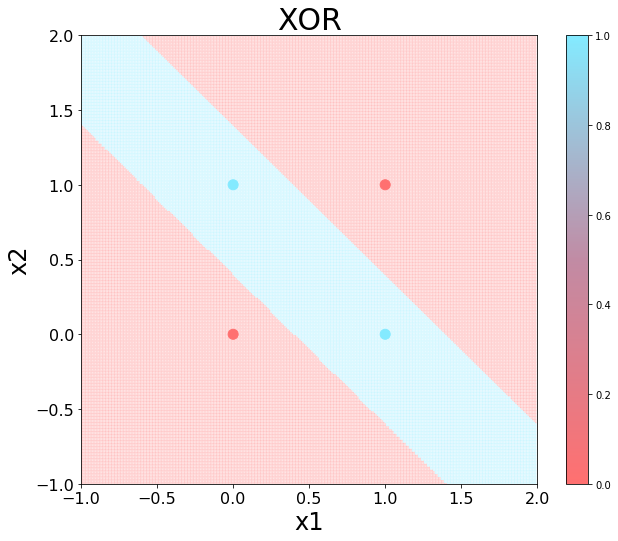

In [39]:
draw(XOR, 'XOR')